# Tema 2

# Transformaciones de intensidad



In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

### Ampliación del rango dinámico

En primer lugar vamos a comenzar programando una función que reciba una imagen. A continuación, el programa debe calcular el rango dinámico de la imagen y mostrarlo por pantalla. Por último, el programa debe crear una nueva imagen aplicando una transformación de intensidades con el objetivo de ampliar el rango dinámico. Para ello, recuerda que si el rango dinámico de la imagen original es $[a_l,a_h]$, el rango dinámico de la imagen transformada debe ser $[0,255]$. Para realizar este programa varios a realizar varias versiones del mismo:

- Versión 1: Crear un programa formado por dos bucles for  anidados. El for  exterior iterará sobre el número de filas y el for  interior lo hará sobre el número de columnas de la imagen. En cada iteración se modificará cada uno de los píxeles de la imagen


In [3]:
def ampliacion_v1(imagen):
    minimo = int(imagen.min())
    maximo = int(imagen.max())

    base, altura = imagen.shape

    print(f"El rango dinamico de la imagen es ({minimo},{maximo}) y sus dimensiones son ({base}x{altura})")
    
    imagen2 = np.empty_like(imagen)
    for i in range(base):
        for j in range(altura):
            imagen2[i,j] = (imagen[i][j] - minimo) *(255) / (maximo - minimo)
            
    return imagen2

    

El rango dinamico de la imagen es (90,138) y sus dimensiones son (500x500)
El nuevo rango dinamico es (0,255)


(-0.5, 499.5, 499.5, -0.5)

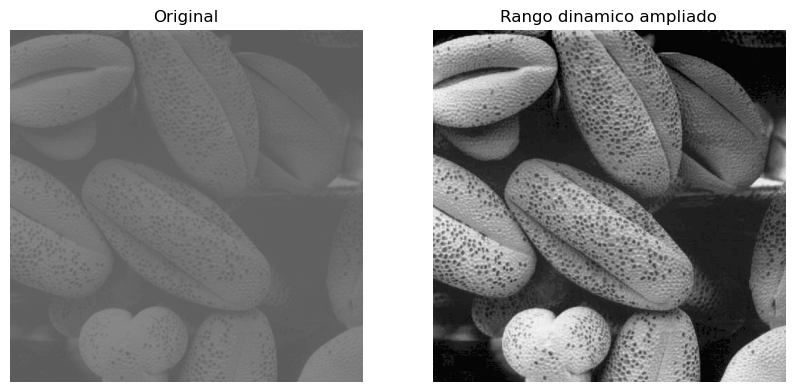

In [4]:
imagen = cv2.imread('images/polen.jpg', cv2.IMREAD_GRAYSCALE)


imagen2 = ampliacion_v1(imagen)

fig, axes = plt.subplots(1,2, figsize =(10,5))
axes[0].imshow(imagen,cmap = 'gray', vmin = 0, vmax = 255)
axes[0].set_title("Original")
axes[0].axis('off')

print(f"El nuevo rango dinamico es ({imagen2.min()},{imagen2.max()})")

axes[1].imshow(imagen2, cmap = 'gray', vmin = 0, vmax = 255)
axes[1].set_title("Rango dinamico ampliado")
axes[1].axis('off')

El rango dinamico de la imagen es (90,138) y sus dimensiones son (500x500)


(0.0, 256.0)

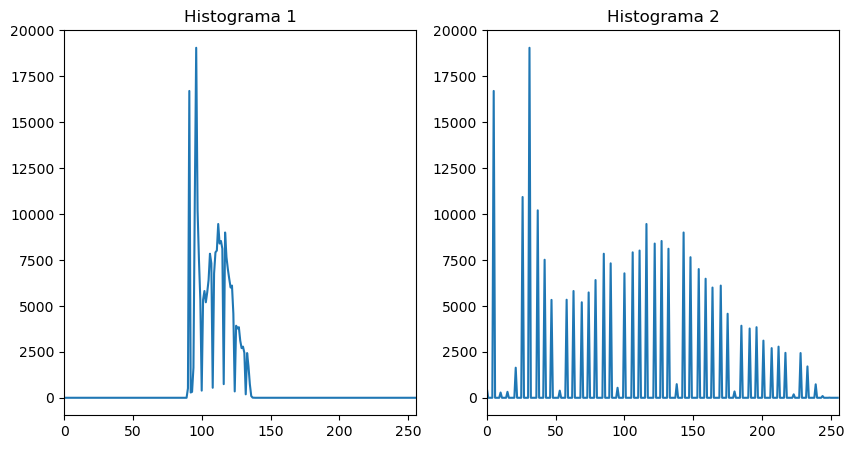

In [5]:
imagen = cv2.imread('images/polen.jpg', cv2.IMREAD_GRAYSCALE)

imagen2 = ampliacion_v1(imagen)

hist1 = cv2.calcHist([imagen],[0],None, [256], [0,256])
hist2 = cv2.calcHist([imagen2],[0],None, [256],[0,256])

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(hist1)
axes[0].set_title("Histograma 1")
axes[0].set_xlim(0, 256)

axes[1].plot(hist2)
axes[1].set_title("Histograma 2")
axes[1].set_xlim(0, 256)


- Versión 2: Crear un programa que aplique la transformación de intensidad sin utilizar ningún bucle for. 


In [6]:
def ampliacion_v2(imagen):
    min_rango = int(imagen.min())
    max_rango = int(imagen.max())
    
    imagen2 = imagen.astype(np.int32)
    imagen3 = (imagen2-min_rango)*255 // (max_rango - min_rango)
    
    return imagen3

In [7]:
imagen = cv2.imread('images/polen.jpg', cv2.IMREAD_GRAYSCALE)
print(f"El rango dinamico es ({imagen.min()},{imagen.max()})")
imagen2 = ampliacion_v2(imagen)
print(f"El nuevo rango dinamico es ({imagen2.min()},{imagen2.max()})")


El rango dinamico es (90,138)
El nuevo rango dinamico es (0,255)


Una vez implementada la segunda versión, aplica el programa sobre la imagen polen y compara las dos imágenes (original y transformada). Haz lo mismo con la imagen radiografia. ¿Existe alguna diferencia entre el comportamiento de ambas imágenes? ¿Por qué?

### Ecualización del histograma

En segundo lugar vamos a realizar un programa que reciba una imagen y aplique la transformación de intensidad basada en ecualización del histograma. Para ello, comenzaremos obteniendo el histograma de la imagen de entrada. Si tuviésemos que crear un histograma de manera manual, deberíamos utilizar una función del estilo...

In [8]:
def calculaHistograma(imagen):
    histograma = np.zeros((256))
    filas, columnas = imagen.shape
    for i in range(filas):
        for j in range(columnas):
            histograma[imagen[i,j]] += 1
    return histograma

#Al hacer el histograma lo que calculamos es la frecuencia de los pixeles

Sin embargo, estamos utilizando una librería (opencv) con muchas funciones built-in, entre las cuales seguro que se encuentra  una para calcular el histograma. En este caso se denomina calcHist y tiene los siguientes parámetros de entrada:
- images: conjunto de imágenes sobre las que queremos aplicar el histograma. Si solo vamos a calcular el histograma de una sola imagen también debemos colocarla en formato lista (entre corchetes [imagen])
- channels: canales sobre los que queremos calcular el histograma de las imágenes. Si, por ejemplo, la imagen es en escala de grises debemos especificar [0]
- mask: máscara que indica la zona de la imagen de la que queremos obtener el histograma. Si queremos el histograma de toda la imagen escribimos None
- histSize: dimensión del histograma. En este caso es el número de "bins" en los que queremos obtener el histograma. Para obtener un histograma completo, escribir [256]
- range: rango de intensidades para el que queremos obtener el histograma, generalmente [0,256]

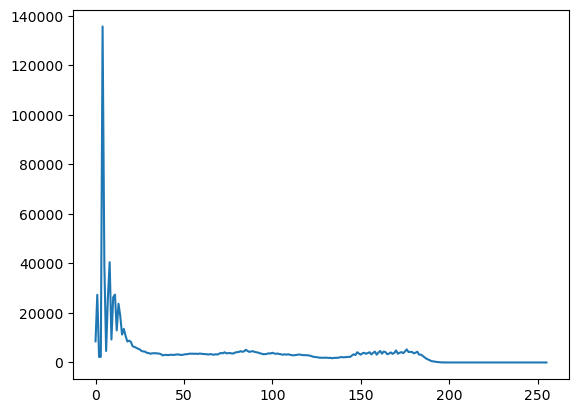

In [9]:
imagen = cv2.imread('images/radiografia.jpg', 0)
h = cv2.calcHist([imagen], [0], None, [256], [0,256])
#formato de calcHist(imagen, canal[0] escala de grises, hist zone, all -> None, [256], rango de intensidades [0,256])

plt.plot(h)


Además de la función calcHist, la propia librería numpy tiene una función llamada histogram() que prácticamente funciona igual. La única diferencia es que np.histogram nos devolverá una tupla: el primer elemento contiene el conteo (histograma) y el segundo contiene los bins utilizados.

In [10]:
imagen = cv2.imread('images/radiografia.jpg', 0)
h, bins = np.histogram(imagen, bins = 256, range = [0,256])
h

array([  8534,  27332,   2218,   2285, 135652,  39348,   4653,  26313,
        40478,   9292,  26343,  27421,  12958,  23720,  18726,  11263,
        13554,  10719,   8473,   8801,   8297,   6533,   6276,   5954,
         5549,   5301,   4649,   4459,   4384,   3898,   3808,   3532,
         3707,   3704,   3735,   3645,   3584,   3364,   2840,   3078,
         3076,   2953,   3085,   3104,   3054,   3118,   3237,   3250,
         3043,   3065,   3181,   3340,   3358,   3544,   3550,   3511,
         3513,   3521,   3470,   3612,   3495,   3455,   3383,   3317,
         3214,   3411,   3216,   3148,   3311,   3211,   3567,   3855,
         3684,   4120,   3690,   3763,   3823,   3654,   3640,   4017,
         4165,   4224,   4572,   4314,   4495,   5128,   4649,   4268,
         4450,   4562,   4252,   4104,   3980,   3717,   3504,   3331,
         3365,   3492,   3699,   3616,   3920,   3630,   3512,   3606,
         3410,   3286,   3142,   3303,   3141,   3339,   3107,   2965,
      

Entonces, ¿existe alguna diferencia? Una de ellas es el tiempo de ejecución. Utilicemos para ello el comando %%time al principio de la celda para analizar el tiempo de ejecución. ¿Hay diferencias?

In [11]:
%%time
imagen = cv2.imread('images/radiografia.jpg', 0)
h = cv2.calcHist([imagen], [0], None, [256], [0,256])

CPU times: user 1.75 ms, sys: 680 μs, total: 2.43 ms
Wall time: 1.8 ms


In [12]:
%%time
imagen = cv2.imread('images/radiografia.jpg', 0)
h, bins = np.histogram(imagen, bins = 256, range = [0,256])

CPU times: user 5.58 ms, sys: 927 μs, total: 6.5 ms
Wall time: 5.8 ms


Una vez entendida la función calcHist, volvamos al problema.
- Versión 1: Crear un programa formado por tres bucles for anidados. Los dos primeros bucles for iteran sobre el número de filas y columnas de la imagen, respectivamente. Para cada píxel de la imagen, vamos a calcular mediante el tercer for la suma de las probabilidades de las intensidades menores que dicho pixel
$$\sum_{i=0}^{a}h_p(i)$$
donde $a=imagen[i,j]$ y $h_p(i)$ es la probabilidad de la intensidad $i$ en la imagen. 

In [13]:
def ecualizacion_v1(imagen):

    if imagen.ndim != 2:
        return

    hist = cv2.calcHist([imagen], [0], None,[256],[0,256])

    filas, columnas = imagen.shape
    hp = hist / (filas*columnas)


    imagen2 = np.zeros_like(imagen)
    for i in range(filas):
        for j in range(columnas):
            a = imagen[i, j]
            suma = 0
            for k in range(0,a+1):
                suma += hp[k]
            imagen2[i,j] = int(suma * 255)



    return imagen2

/var/folders/x1/zlr91hyj1kb9jx7yvlg1rcn80000gn/T/ipykernel_23322/2361391760.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  imagen2[i,j] = int(suma * 255)


[[ 17  17  17 ... 118 118 103]
 [ 17  17  17 ... 111 111  96]
 [ 17  17  17 ...  91  91  79]
 [ 17  17  17 ...  73  79  50]
 [ 17  17  17 ...  31  19  17]]


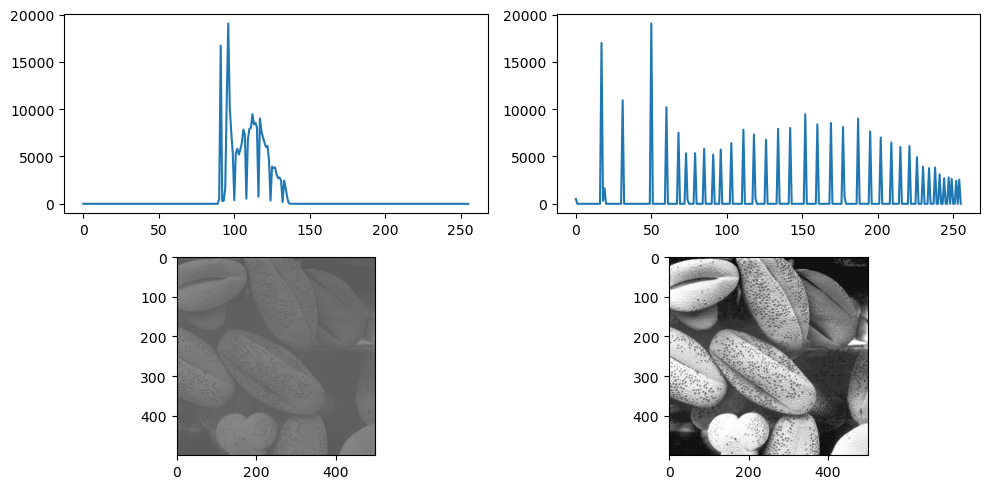

In [14]:
imagen = cv2.imread('images/polen.jpg', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist([imagen],[0],None, [256], [0,256])

imagen2 = ecualizacion_v1(imagen)

hist2 = cv2.calcHist([imagen2],[0],None, [256],[0,256])

fig,axes = plt.subplots(2,2,figsize=(10,5))

axes[0][0].plot(hist1)
axes[1][0].imshow(imagen, cmap='gray',vmin = 0, vmax = 255)
axes[0][1].plot(hist2)
axes[1][1].imshow(imagen2, cmap='gray',vmin = 0, vmax = 255)
plt.tight_layout()  

print(imagen2[:5])

- Versión 2: Crear un programa que, una vez obtenido el histograma, lo transforme en un función de densidad de probabilidad y a continuación lo transforme en una función de distribución (función de densidad de probabilidad acumulada). A continuación utiliza los dos bucles de filas y columnas para modificar cada píxel: si en la posición (i,j) la imagen tiene intensidad q, entonces cambiar el valor de dicha intensidad por el valor q-ésimo de la función de distribución.


In [15]:
def ecualizacion_v2(imagen):
    if imagen.ndim != 2:
        return
    hist = cv2.calcHist([imagen],[0],None,[256],[0,256])
    rows, columns = imagen.shape
    hp = hist /(rows*columns) #funcion de densidad de probabilidad
    
    cdf = np.cumsum(hp) #va sumando cada uno de los indices con el anterior logico
    #escalamos el rango de intensidades porque cdf esta entre [0,1]
    cdf = (cdf * 255).astype('uint8') #escala[0,255]

    imagen2 = np.zeros_like(imagen)

    for i in range(rows):
        for j in range(columns):
            q = int(imagen[i,j])
            imagen2[i,j] = cdf[q]

    return imagen2

[[ 17  17  17 ... 118 118 103]
 [ 17  17  17 ... 111 111  96]
 [ 17  17  17 ...  91  91  79]
 [ 17  17  17 ...  73  79  50]
 [ 17  17  17 ...  31  19  17]]


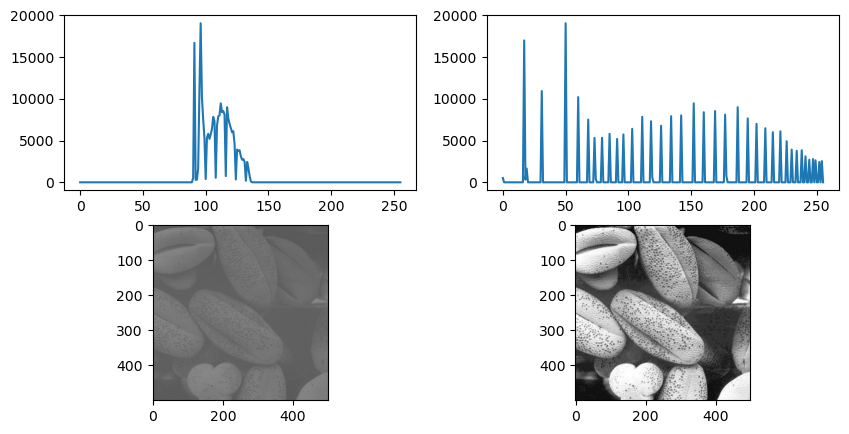

In [16]:
imagen = cv2.imread('images/polen.jpg',cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist([imagen],[0],None,[256],[0,256])

imagen2 = ecualizacion_v2(imagen)

hist2 = cv2.calcHist([imagen2],[0],None,[256],[0,256])

fig, axes = plt.subplots(2,2,figsize=(10,5))

axes[0,0].plot(hist1)
axes[0,1].plot(hist2)
axes[1,0].imshow(imagen,cmap='gray',vmin=0,vmax=256)
axes[1,1].imshow(imagen2,cmap='gray',vmin=0,vmax=256)

print(imagen2[:5])


- Versión 3: ¿Se te ocurre alguna manera de hacer lo mismo que antes pero evitándonos los dos bucles for anidados?


In [17]:
def ecualizacion_v3(imagen):
    if imagen.ndim != 2:
        return
    hist = cv2.calcHist([imagen],[0],None,[256],[0,256])
    rows, columns = imagen.shape
    hp = hist /(rows*columns) #funcion de densidad de probabilidad
    
    cdf = np.cumsum(hp) #va sumando cada uno de los indices con el anterior logico
    #escalamos el rango de intensidades porque cdf esta entre [0,1]
    cdf = (cdf * 255).astype('uint8').flatten() #escala[0,255]

    imagen2 = np.zeros_like(imagen)
    imagen2 = cdf[imagen]

    return imagen2

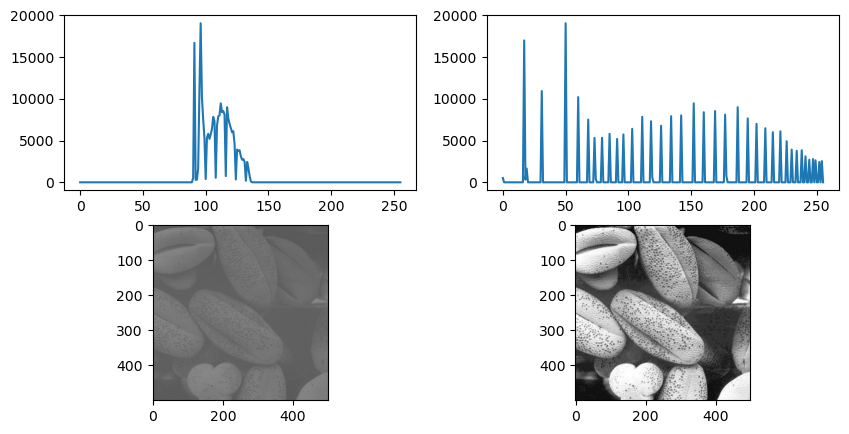

In [18]:
imagen = cv2.imread('images/polen.jpg',cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist([imagen],[0],None,[256],[0,256])

imagen2 = ecualizacion_v3(imagen)

hist2 = cv2.calcHist([imagen2],[0],None,[256],[0,256])

fig, axes = plt.subplots(2,2,figsize=(10,5))

axes[0,0].plot(hist1)
axes[0,1].plot(hist2)
axes[1,0].imshow(imagen,cmap='gray',vmin=0,vmax=256)
axes[1,1].imshow(imagen2,cmap='gray',vmin=0,vmax=256)

Una vez finalizadas las 3 opciones, compara los tiempos de ejecución. Para conocer el tiempo de ejecución de una llamada a una función o una instrucción puedes utilizar

%time imagen2 = ecualizacion_v3(imagen)

o 

%timeit imagen2 = ecualizacion_v3(imagen)


In [19]:
%time imagen2 = ecualizacion_v3(imagen)

%time imagen2 = ecualizacion_v2(imagen)

%time imagen2 = ecualizacion_v1(imagen)

CPU times: user 711 μs, sys: 477 μs, total: 1.19 ms
Wall time: 683 μs
CPU times: user 31.4 ms, sys: 727 μs, total: 32.1 ms
Wall time: 32 ms


/var/folders/x1/zlr91hyj1kb9jx7yvlg1rcn80000gn/T/ipykernel_23322/2361391760.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  imagen2[i,j] = int(suma * 255)


CPU times: user 11.4 s, sys: 178 ms, total: 11.5 s
Wall time: 11.6 s
